<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Definition" data-toc-modified-id="Definition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definition</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Defining-a-portfoilio" data-toc-modified-id="Defining-a-portfoilio-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Defining a portfoilio</a></span></li><li><span><a href="#Capturing-trade-off-in-a-single-number" data-toc-modified-id="Capturing-trade-off-in-a-single-number-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Capturing trade-off in a single number</a></span></li><li><span><a href="#Sharpe-Ratio" data-toc-modified-id="Sharpe-Ratio-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sharpe Ratio</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Sharpe Ratio

</font>
</div>

# Definition
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Represents both the risk and return
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its ris
- Goal is to get high $SR$. 

$SR = \frac{R_p - R_f}{\sigma_p}$


- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Import data
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Where our portfolio will consist of the tickers for Apple, Microsoft, Twitter and IBM (AAPL, MSFT, TWTR, IBM). We read the data from start 2020 from the Yahoo! Finance API using Pandas Datareader.

- Finally, we only keep the Adjusted Close price.

</font>
</div>

In [2]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)


In [3]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2020-01-02  73.683571  156.592010  32.299999  112.916931  75.087502   
2020-01-03  72.967216  154.642166  31.520000  112.016403  74.357498   
2020-01-06  73.548630  155.041855  31.639999  111.816292  74.949997   
2020-01-07  73.202736  153.628235  32.540001  111.891319  74.597504   
2020-01-08  74.380287  156.075287  33.049999  112.825211  75.797501   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   
2020-01-08  160.089996  33.049999  129.359467  76.110001  160.800003  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   
2020-01-08  32.349998  128.030594  74.290001  158.929993  32.349998   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0  14632400.0  4545916.0  

[5 rows x 24 columns]

In [4]:
data = data['Adj Close']

In [5]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,73.683571,156.592010,32.299999,112.916931
2020-01-03,72.967216,154.642166,31.520000,112.016403
2020-01-06,73.548630,155.041855,31.639999,111.816292
2020-01-07,73.202736,153.628235,32.540001,111.891319
2020-01-08,74.380287,156.075287,33.049999,112.825211
...,...,...,...,...
2022-08-23,167.229996,276.440002,39.860001,134.740005
2022-08-24,167.529999,275.790009,40.790001,133.229996
2022-08-25,170.029999,278.850006,41.049999,133.979996


#  Defining a portfoilio
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Let’s assume our portfolio is balanced as follows, 25%, 15%, 40%, and 20% to AAPL, MSFT, TWTR, IBM, respectively.

- Then we can calculate the daily log return of the portfolio.
    
- This gives an impression of how volatile the portfolio is. The more data is centered around 0.0, the less volatile and risky.
    
</font>
</div>

In [6]:
portfolio = [.25, .15, .40, .20]
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [7]:
log_return

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2022-08-23   -0.032839
2022-08-24    0.007066
2022-08-25    0.009023
2022-08-26   -0.026748
2022-08-29   -0.009336
Length: 670, dtype: float64

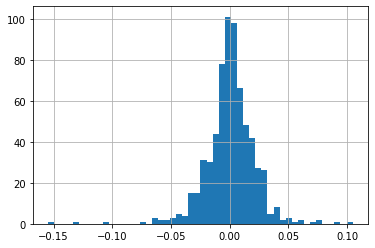

In [9]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax);

# Capturing trade-off in a single number
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The return and risk objectives imply a trade-off: taking more risk may yield higher returns in some circumstances, but also implies greater downside. 

- To compare how different strategies navigate this trade-off, ratios that compute a measure of return per unit of risk are very popular. 

- Two of the most popular are: 
    - Sharpe ratio (SR)
    - Information ratio (IR)

</font>
</div>

# Sharpe Ratio
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- This gives a daily Sharpe Ratio, where we have the return to be the mean value. That is, the average return of the investment. And divided by the standard deviation.

- The greater is the standard deviation the greater the magnitude of the deviation from the mean value can be expected.

</font>
</div>

In [12]:
sharpe_ratio = log_return.mean()/log_return.std()
sharpe_ratio

0.02698159347400582

In [13]:
# To get an annualized Sharpe Ratio
sharpe_ratio_annual = sharpe_ratio*252**.5
sharpe_ratio_annual

0.4283195178507762

In [1]:
252**.5

15.874507866387544

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- [GitHub code](https://github.com/LearnPythonWithRune/PythonForFinanceRiskAndReturn/blob/main/03%20-%20Sharpe%20Ratio.ipynb)
- https://www.learnpythonwithrune.org/python-for-finance-risk-and-return/#lesson-3
- https://www.investopedia.com/terms/s/sharperatio.asp
- Jansen, Stefan. Hands-On Machine Learning for Algorithmic Trading: Design and implement investment strategies based on smart algorithms that learn from data using Python. Packt Publishing Ltd, 2018.

</font>
</div>